## Overview

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

The data has several columns, including:

- **RespondentID** - An anonymized ID for the respondent (person taking the survey)

- **Gender** - The respondent's gender

- **Age** - The respondent's age

- **Household Income** - The respondent's income

- **Education** - The respondent's education level

- **Location (Census Region)** - The respondent's location

- **Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response

- **Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.



#### Reading in the data

In [2]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


First, we'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID

#### View all columns

In [4]:
star_wars.columns.values.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

In [5]:
star_wars.shape

(1187, 38)

#### Remove any rows where RespondentID is NaN

In [6]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [7]:
star_wars.shape

(1186, 38)

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

## Cleaning And Mapping Yes/No Columns


#### Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type.


In [9]:
yes_no = {"Yes":True, "No": False}

In [10]:
col = star_wars['Have you seen any of the 6 films in the Star Wars franchise?']
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = col.map(yes_no)

#### Convert the Do you consider yourself to be a fan of the Star Wars film franchise? column to the Boolean type.

In [11]:
col = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = col.map(yes_no)

## Cleaning And Mapping Checkbox Columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

**Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.

**Unnamed: 4** - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.

**Unnamed: 5** - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.

**Unnamed: 6** - Whether or not the respondent saw Star Wars: Episode IV A New Hope.

**Unnamed: 7** - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.

**Unnamed: 8** - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [12]:
import numpy as np
yes_no = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

In [13]:
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(yes_no)

In [14]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": 'seen_1',
    "Unnamed: 4": 'seen_2',
    "Unnamed: 5": 'seen_3',
    "Unnamed: 6": 'seen_4',
    "Unnamed: 7": 'seen_5',
    "Unnamed: 8": 'seen_6',
})

In [15]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning The Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of
least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

**Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** - How much the respondent liked Star Wars: Episode I The Phantom Menace

**Unnamed: 10** - How much the respondent liked Star Wars: Episode II Attack of the Clones

**Unnamed: 11** - How much the respondent liked Star Wars: Episode III Revenge of the Sith

**Unnamed: 12** - How much the respondent liked Star Wars: Episode IV A New Hope

**Unnamed: 13** - How much the respondent liked Star Wars: Episode V The Empire Strikes Back

**Unnamed: 14** - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

#### Convert each of the columns above to a float type.

In [16]:
star_wars[star_wars.columns[9:15]] =  star_wars[star_wars.columns[9:15]].astype(float)

#### Give each column a more descriptive name

In [17]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": 'ranking_1',
    "Unnamed: 10": 'ranking_2',
    "Unnamed: 11": 'ranking_3',
    "Unnamed: 12": 'ranking_4',
    "Unnamed: 13": 'ranking_5',
    "Unnamed: 14": 'ranking_6'    
})

In [18]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding The Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly

In [19]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Container object of 6 artists>

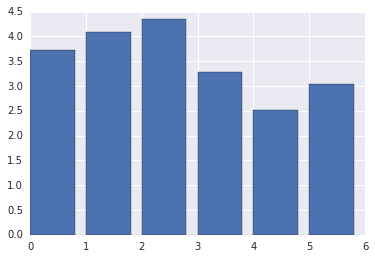

In [21]:
plt.bar(range(6),star_wars[star_wars.columns[9:15]].mean())

**Findings:** The first editions of the movies was with an uptrend and then it changed the trend maybe due to more better movies and competitions than it was in the 60s

## Finding The Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1, and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [22]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

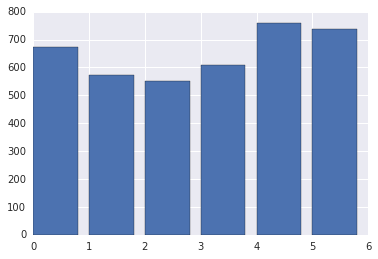

In [23]:
plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum())

**Findings:** The views count is very near across the movies series

## Exploring The Data By Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False

 Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
Gender - Male or Female

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender column

The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group

In [24]:
fans_wars = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans_wars = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [25]:
fans_trek= star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=="Yes"]
non_fans_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=="No"]

In [26]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

####  Highest ranked movie amongst fans VS non-fans

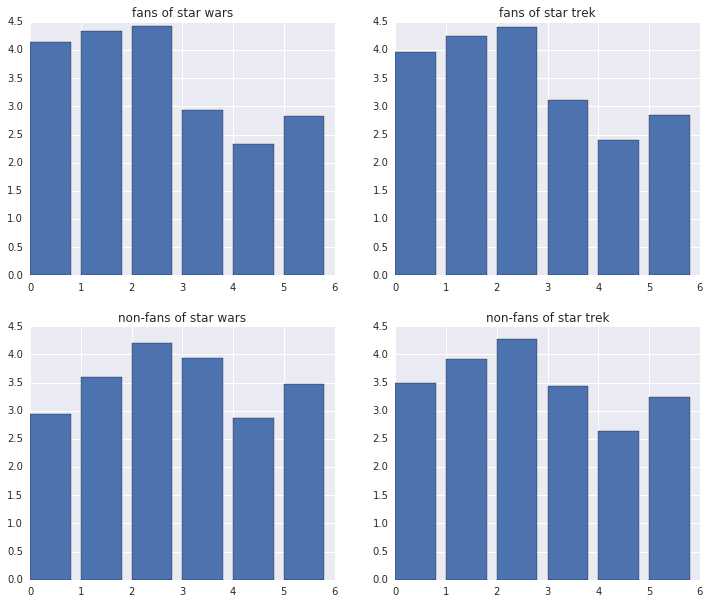

In [50]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(range(6),fans_wars[star_wars.columns[9:15]].mean())
ax2.bar(range(6),fans_trek[star_wars.columns[9:15]].mean())
ax3.bar(range(6),non_fans_wars[star_wars.columns[9:15]].mean())
ax4.bar(range(6),non_fans_trek[star_wars.columns[9:15]].mean())

plt.title("Highest ranked movie amongst fans VS non-fans")
ax1.set_title("fans of star wars")
ax2.set_title("fans of star trek")
ax3.set_title("non-fans of star wars")
ax4.set_title("non-fans of star trek")

plt.show()

#### The most viewed movie amongst fans VS non-fans

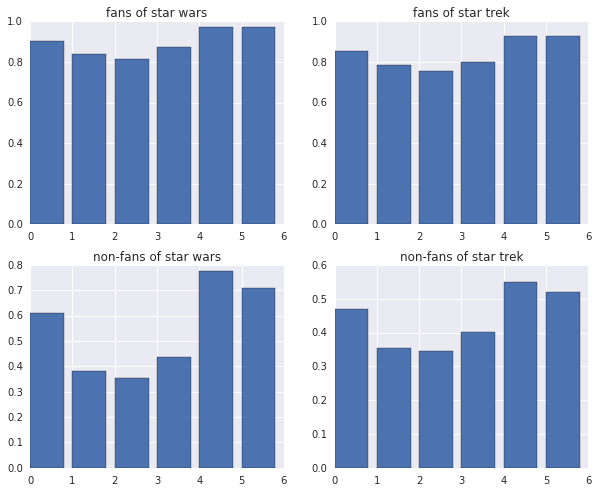

In [45]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(range(6),fans_wars[star_wars.columns[3:9]].mean())
ax2.bar(range(6),fans_trek[star_wars.columns[3:9]].mean())
ax3.bar(range(6),non_fans_wars[star_wars.columns[3:9]].mean())
ax4.bar(range(6),non_fans_trek[star_wars.columns[3:9]].mean())
ax1.set_title("fans of star wars")
ax2.set_title("fans of star trek")
ax3.set_title("non-fans of star wars")
ax4.set_title("non-fans of star trek")
plt.show()


####  Highest ranked movie amongst males Vs females

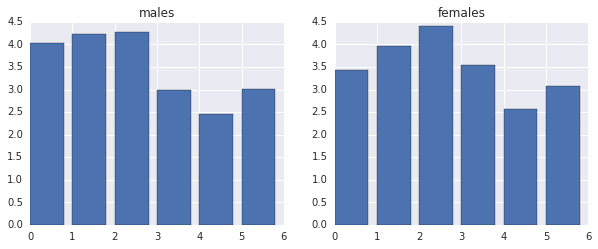

In [51]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)


ax1.bar(range(6),males[star_wars.columns[9:15]].mean())
ax2.bar(range(6),females[star_wars.columns[9:15]].mean())
ax1.set_title("males")
ax2.set_title("females")

plt.show()


#### The most viewed movie amongst males VS females

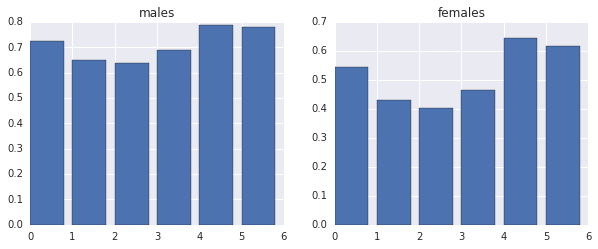

In [53]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)


ax1.bar(range(6),males[star_wars.columns[3:9]].mean())
ax2.bar(range(6),females[star_wars.columns[3:9]].mean())
ax1.set_title("males")
ax2.set_title("females")

plt.show()
